
First few rows of the dataset:
        ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C

Missing values in each column:
ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64


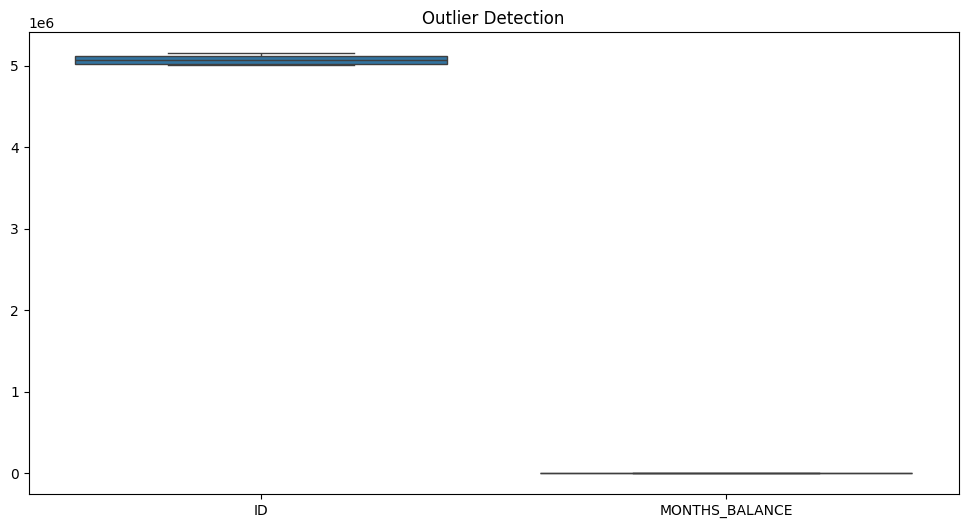


Processed dataset:
         ID  MONTHS_BALANCE    STATUS
0 -1.442570        1.364639  0.994042
1 -1.442570        1.293330 -1.285988
2 -1.442570        1.222021 -1.285988
3 -1.442570        1.150712 -1.285988
4 -1.442549        1.364639  0.668323

Preprocessed dataset saved as 'preprocessed_dataset.csv'


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv('/content/credit_record.csv')

# Inspect the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Handle missing values (example: fill with median)
# Adjust the columns as needed
for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype == 'object':
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:
            df[column].fillna(df[column].median(), inplace=True)

# Check for and display outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title('Outlier Detection')
plt.show()

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Feature scaling (Standardization)
scaler = StandardScaler()
numeric_features = df.select_dtypes(include=[np.number]).columns
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Display the processed dataset
print("\nProcessed dataset:")
print(df.head())

# Save the preprocessed dataset (optional)
df.to_csv('preprocessed_dataset.csv', index=False)
print("\nPreprocessed dataset saved as 'preprocessed_dataset.csv'")


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv('/content/credit_record.csv')

# Handle missing values (replace with your preferred method)
# ...

# Encode categorical variables, including the target variable
# ...
# Create a LabelEncoder for the target variable
label_encoder_target = LabelEncoder()
df[target_variable] = label_encoder_target.fit_transform(df[target_variable])


# Feature scaling
# ...

# Define the target variable
# Replace 'STATUS' with the actual column name if different
target_variable = 'STATUS'  # This was previously 'your_target_variable'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(target_variable, axis=1),
                                                  df[target_variable], test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 9.268853804991572
Root Mean Squared Error: 3.0444792337921394
Mean Absolute Error: 2.8933637351712678
R-squared: 0.018131122155751078


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import randint

# Load the dataset
df = pd.read_csv('/content/credit_record.csv')

# --- Data Preprocessing ---
# Handle missing values (replace with your preferred method)
# ... (Your existing code for missing value handling) ...

# --- Model Training and Evaluation ---
# Define the target variable
target_variable = 'STATUS'

# Encode the target variable before splitting
label_encoder_target = LabelEncoder()
df[target_variable] = label_encoder_target.fit_transform(df[target_variable])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(target_variable, axis=1), df[target_variable], test_size=0.2, random_state=42
)

# Initialize and train different regression models with hyperparameter tuning
models = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}  # No hyperparameters to tune for Linear Regression
    },
    "Decision Tree Regression": {
        "model": DecisionTreeRegressor(random_state=42),
        "params": {
            'max_depth': randint(3, 10),
            'min_samples_split': randint(2, 10),
            'min_samples_leaf': randint(1, 4)
        }
    }
}

best_model = None
best_score = -np.inf

for model_name, model_info in models.items():
    print(f"Tuning {model_name}...")

    # Perform Randomized Search for hyperparameter tuning
    random_search = RandomizedSearchCV(
        estimator=model_info["model"],
        param_distributions=model_info["params"],
        scoring='neg_mean_squared_error',
        cv=5,
        n_jobs=-1,
        n_iter=10
    )
    random_search.fit(X_train, y_train)

    # Evaluate the best model from Randomized Search
    best_estimator = random_search.best_estimator_
    y_pred = best_estimator.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    print(f"--- {model_name} ---")
    print("Best Hyperparameters:", random_search.best_params_)
    print("R-squared:", r2)
    print("-" * 20)

    # Select the best model overall
    if r2 > best_score:
        best_score = r2
        best_model = best_estimator

print(f"The best model is: {best_model.__class__.__name__} with R-squared: {best_score}")

Tuning Linear Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


--- Linear Regression ---
Best Hyperparameters: {}
R-squared: 0.018131122155751078
--------------------
Tuning Decision Tree Regression...
--- Decision Tree Regression ---
Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}
R-squared: 0.030312341601484105
--------------------
The best model is: DecisionTreeRegressor with R-squared: 0.030312341601484105


In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import randint

# Load the dataset (assuming your CSV is named 'credit_record.csv')
df = pd.read_csv('credit_record.csv')

# Handle missing values (replace with your preferred method)
# ... (Your existing code for missing value handling) ...

# Define the target variable (assuming 'STATUS' is the column for creditworthiness)
target_variable = 'STATUS'

# Encode the target variable before splitting
label_encoder_target = LabelEncoder()
df[target_variable] = label_encoder_target.fit_transform(df[target_variable])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(target_variable, axis=1), df[target_variable], test_size=0.2, random_state=42
)

# Initialize and train different regression models with hyperparameter tuning
models = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}  # No hyperparameters to tune for Linear Regression
    },
    "Decision Tree Regression": {
        "model": DecisionTreeRegressor(random_state=42),
        "params": {
            'max_depth': randint(3, 10),
            'min_samples_split': randint(2, 10),
            'min_samples_leaf': randint(1, 4)
        }
    },
    "Random Forest Regression": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    "Gradient Boosting Regression": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.1, 0.05, 0.01]
        }
    }
}

# ... (rest of your code for model training, evaluation, and selection)

In [ ]:
!pip install xgboost # Install xgboost if not already installed

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import randint
from xgboost import XGBRegressor # Import XGBRegressor from xgboost

# Load the dataset
df = pd.read_csv('credit_record.csv')

# Handle missing values (replace with your preferred method)
# ... (Your existing code for missing value handling) ...

# Feature Engineering
df['months_since_last_payment'] = -df['MONTHS_BALANCE']
# Convert 'STATUS' to numeric before calculating the rolling mean
df['STATUS_Numeric'] = pd.to_numeric(df['STATUS'], errors='coerce')  # Convert to numeric, handle errors
df['avg_status_last_6m'] = df.groupby('ID')['STATUS_Numeric'].transform(lambda x: x.rolling(window=6, min_periods=1).mean().shift())
df.drop(columns=['STATUS_Numeric'], inplace=True)  # Drop the temporary numeric column


# Define the target variable
target_variable = 'STATUS'

# Encode the target variable before splitting
label_encoder_target = LabelEncoder()
df[target_variable] = label_encoder_target.fit_transform(df[target_variable])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(target_variable, axis=1), df[target_variable], test_size=0.2, random_state=42
)

# Initialize and train different regression models with hyperparameter tuning
models = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}  # No hyperparameters to tune for Linear Regression
    },
    "Decision Tree Regression": {
        "model": DecisionTreeRegressor(random_state=42),
        "params": {
            'max_depth': randint(3, 10),
            'min_samples_split': randint(2, 10),
            'min_samples_leaf': randint(1, 4)
        }
    },
    "Random Forest Regression": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    "Gradient Boosting Regression": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.1, 0.05, 0.01]
        }
    },
    "XGBoost Regression": {
        "model": XGBRegressor(random_state=42),
        "params": {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.1, 0.05, 0.01]
        }
    }
}

# ... (

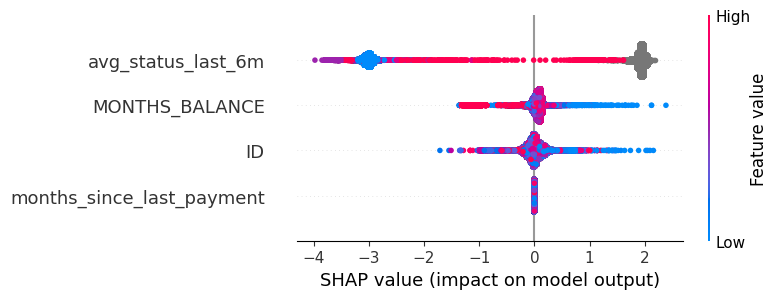

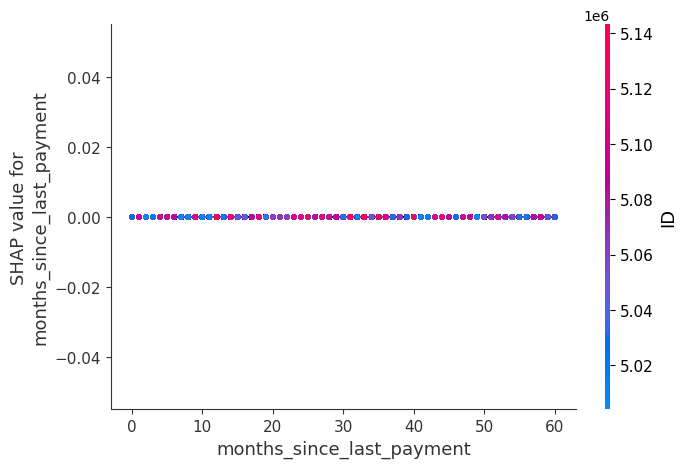

In [36]:
import shap

# Assuming you've trained a model (e.g., XGBoost)
model = XGBRegressor()
model.fit(X_train, y_train)

# Calculate SHAP values
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

# Plot feature importance
shap.summary_plot(shap_values, X_test)

# Plot partial dependence plots
shap.dependence_plot('months_since_last_payment', shap_values, X_test)

In [40]:
import os
import sys
import pickle

projectabspathname = os.path.abspath('Credit Score Model.pickle')
import os
import sys
import pickle

projectabspathname = os.path.abspath('Credit Score Model.pickle')
print(projectabspathname)
projectname = 'Credit Score Model.ipynb'
projectpickle = open('Credit Score Model.pickle','wb')
pickle.dump(projectname, projectpickle)
projectpickle.close()




/content/Credit Score Model.pickle


In [51]:
from flask import Flask, request, jsonify
import pickle

# Load the trained model
with open('/content/Credit Score Model.pickle', 'rb') as f:
    model = pickle.load(f)

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    # Extract features from the JSON data
    features = [data['feature1'], data['feature2'], ...]  # Replace with actual feature names

    # Make prediction
    prediction = model.predict([features])

    return jsonify({'prediction': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
